In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [3]:
with h5py.File("F:/PhD_Franziska/Headon/Headon_results/v1_slice3/fftcc_corr_alg_no_post/U_matrix", "r") as file:
    U = file["matrix"][:]

with h5py.File("F:/PhD_Franziska/Headon/Headon_results/v1_slice3/fftcc_corr_alg_no_post/V_matrix", "r") as file:
    V = file["matrix"][:]

with h5py.File("F:/PhD_Franziska/Headon/Headon_results/v1_slice3/fftcc_corr_alg_no_post/M_matrix", "r") as file:
    M = file["matrix"][:]
    
with h5py.File("F:/PhD_Franziska/Headon/Headon_results/v1_slice3/fftcc_corr_alg_no_post/xgrid_matrix", "r") as file:
    xgrid = file["matrix"][:]
    
with h5py.File("F:/PhD_Franziska/Headon/Headon_results/v1_slice3/fftcc_corr_alg_no_post/ygrid_matrix", "r") as file:
    ygrid = file["matrix"][:]

In [4]:
with h5py.File("F:/PhD_Franziska/Headon/Headon_results/headon_layer_3_v1.h5", "r") as file:
    slices = file["data"][:]

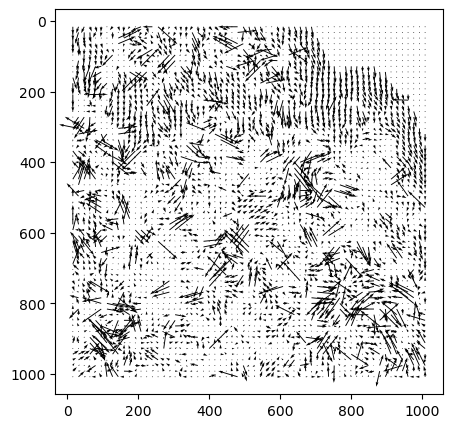

In [5]:
t = 150

plt.figure(figsize=(5, 5))
plt.quiver(xgrid[t], ygrid[t], V[t], -U[t], scale=200)
plt.gca().invert_yaxis()
plt.show()

## Averaging of vector fields over sliding intervals.

In [6]:
U

array([[[  0.        ,   0.        ,   0.        , ...,   4.        ,
           2.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   4.092037  ,
           3.8852768 , -10.        ],
        [  0.        ,   0.        ,   0.        , ...,   3.9013004 ,
           3.1556835 ,   0.        ],
        ...,
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           1.8669395 ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   2.818184  ,
           3.2231627 ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   2.        ,
           3.        ,   0.        ]],

       [[  0.        ,   0.        ,   0.        , ...,   6.        ,
           4.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   5.7896004 ,
           5.6934376 ,  -9.225117  ],
        [  0.        ,   0.        ,   0.        , ...,   5.759865  ,
           5.555891  ,  -5.731134  ],
        ...,


In [6]:
def vector_avg(t, interval):
    U = U[t]
    V = V[t]

    if t < interval:
        

## Filter out the extra long vectors
Depending on the vector length how many times of std above the mean length. 

In [8]:
def postprocess(U, V, M, std_factor):
    # Defining the mask.
    meanM = np.mean(M)
    stdM = np.std(M)
    mask = M < meanM + std_factor * stdM
    M *= mask
    # filter the U, V vector components depending on masked M.
    U[M == 0] = "nan"
    V[M == 0] = "nan"
    return U, V, M

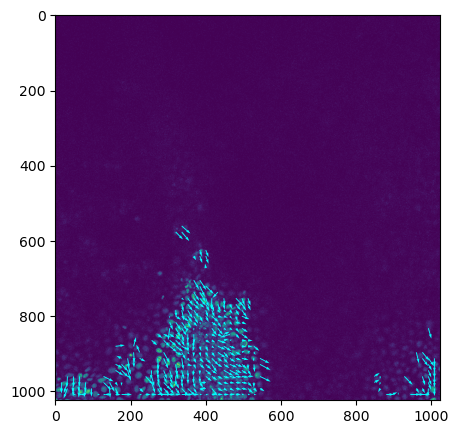

In [9]:
t = 0

U_t, V_t, M_t = postprocess(U[t], V[t], M[t], 3)

plt.figure(figsize=(5, 5))
plt.imshow(slices[t].T)
plt.quiver(xgrid[t], ygrid[t], V_t, -U_t, scale=150, color = "aqua")
#plt.gca().invert_yaxis()
plt.show()

In [42]:
print(M_t)

[[0.         0.         0.         ... 1.5524912  2.9162204  0.        ]
 [0.         0.         0.         ... 0.81969887 1.0854832  0.        ]
 [0.         0.         0.         ... 0.02586263 0.771615   1.        ]
 ...
 [0.         0.         0.         ... 0.         2.909384   2.        ]
 [0.         0.         0.         ... 0.         0.         2.        ]
 [0.         0.         0.         ... 0.         2.794451   0.        ]]
